In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from matplotlib.ticker import FuncFormatter
%matplotlib inline   

In [3]:
Airline = pd.read_csv(r"C:\Users\hp\Desktop\My_Project\Airline_Traffic_Control_K-mean_clustering\AirTraffic_Passenger_Statistics.csv")
Airline.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Region,Terminal,Boarding Area,Passenger Count,Year,Month
15002,201603,Virgin America,VX,US,Terminal 2,D,194636,2016,March
15003,201603,Virgin America,VX,Mexico,International,A,4189,2016,March
15004,201603,Virgin America,VX,Mexico,Terminal 2,D,4693,2016,March
15005,201603,Virgin Atlantic,VS,Europe,International,A,12313,2016,March
15006,201603,Virgin Atlantic,VS,Europe,International,A,10898,2016,March


In [4]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   GEO Region                   15007 non-null  object
 4   Terminal                     15007 non-null  object
 5   Boarding Area                15007 non-null  object
 6   Passenger Count              15007 non-null  int64 
 7   Year                         15007 non-null  int64 
 8   Month                        15007 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.0+ MB


In [5]:
Airline.describe()

,Activity Period,Passenger Count,Year
count,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,2010.385220
std,313.336196,58319.509284,3.137589
min,200507.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,2008.000000
50%,201011.000000,9210.000000,2010.000000
75%,201308.000000,21158.500000,2013.000000
max,201603.000000,659837.000000,2016.000000


In [6]:
Airline.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
GEO Region                      0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Year                            0
Month                           0
dtype: int64

In [7]:
Airline = Airline.drop(columns='Month',axis=1)

In [8]:
col = list(Airline.columns)
col

['Activity Period',
 'Operating Airline',
 'Operating Airline IATA Code',
 'GEO Region',
 'Terminal',
 'Boarding Area',
 'Passenger Count',
 'Year']

In [9]:
Airline.columns = Airline.columns.str.replace(' ', '_')


In [10]:
Airline.describe()

,Activity_Period,Passenger_Count,Year
count,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,2010.385220
std,313.336196,58319.509284,3.137589
min,200507.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,2008.000000
50%,201011.000000,9210.000000,2010.000000
75%,201308.000000,21158.500000,2013.000000
max,201603.000000,659837.000000,2016.000000


In [11]:
Airline_numeric = Airline.select_dtypes(exclude=['object'])
Airline_numeric

,Activity_Period,Passenger_Count,Year
0,200507,27271,2005
1,200507,29131,2005
2,200507,5415,2005
3,200507,35156,2005
4,200507,34090,2005
...,...,...,...
15002,201603,194636,2016
15003,201603,4189,2016
15004,201603,4693,2016
15005,201603,12313,2016


Activity_Period       Axes(0.125,0.11;0.227941x0.77)
Passenger_Count    Axes(0.398529,0.11;0.227941x0.77)
Year               Axes(0.672059,0.11;0.227941x0.77)
dtype: object

<Figure size 4000x800 with 0 Axes>

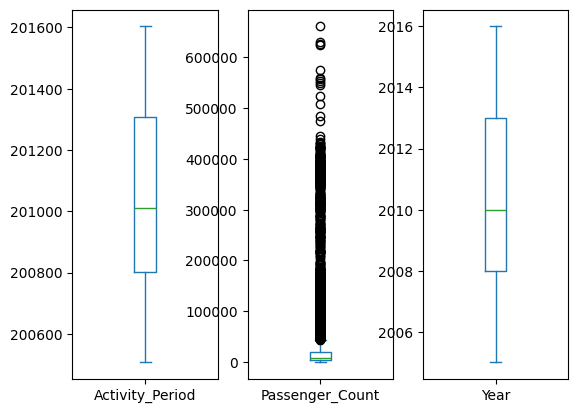

In [12]:
plt.figure(figsize = (40,8))
Airline.plot(kind = 'box', subplots = True)

In [13]:
from scipy.stats.mstats import winsorize
Airline_numeric['Passenger_Count']  =  winsorize(Airline_numeric['Passenger_Count'],limits=(0,0.2))
Airline_numeric['Passenger_Count']

0        27271
1        29131
2         5415
3        32120
4        32120
         ...  
15002    32120
15003     4189
15004     4693
15005    12313
15006    10898
Name: Passenger_Count, Length: 15007, dtype: int64

Activity_Period       Axes(0.125,0.11;0.227941x0.77)
Passenger_Count    Axes(0.398529,0.11;0.227941x0.77)
Year               Axes(0.672059,0.11;0.227941x0.77)
dtype: object

<Figure size 4000x800 with 0 Axes>

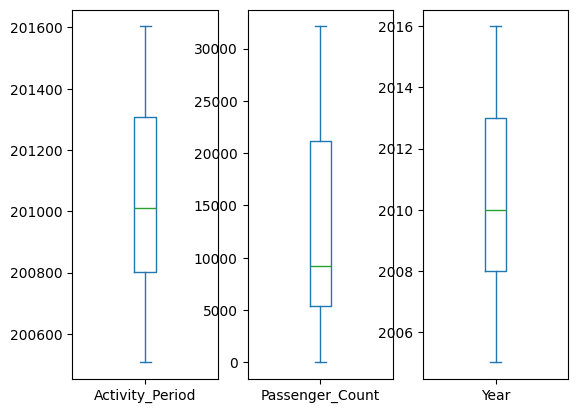

In [14]:
plt.figure(figsize = (40,8))
Airline_numeric.plot(kind = 'box', subplots = True)

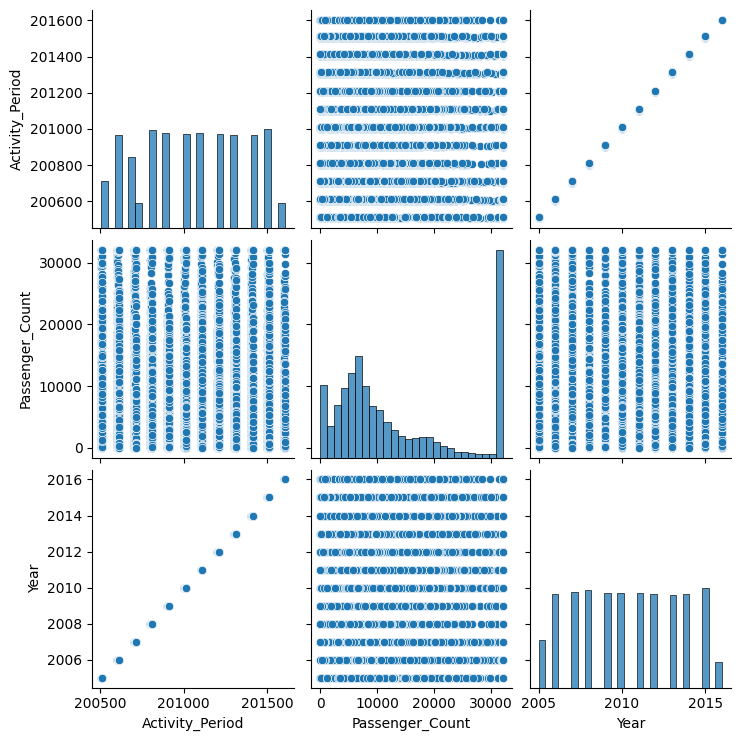

In [15]:
sns.pairplot(Airline_numeric)

In [16]:
Airline.groupby('Year')['Passenger_Count'].sum().reset_index()

,Year,Passenger_Count
0,2005,17222033
1,2006,33332970
2,2007,35554082
3,2008,37234678
4,2009,37338942
5,2010,39253999
6,2011,40927786
7,2012,44399885
8,2013,44945760
9,2014,47114631


In [17]:
Airline.groupby("GEO_Region")['Passenger_Count'].sum().reset_index()

,GEO_Region,Passenger_Count
0,Asia,43972770
1,Australia / Oceania,4729341
2,Canada,13865159
3,Central America,1355400
4,Europe,26646558
5,Mexico,7998587
6,Middle East,1852943
7,South America,250741
8,US,338141001


In [18]:
pivot_Airline = Airline.pivot_table(index='Year', columns='GEO_Region', values='Passenger_Count')
pivot_Airline

GEO_Region,Asia,Australia / Oceania,Canada,Central America,Europe,Mexico,Middle East,South America,US
Year,,,,,,,,,
2005,13038.213333,5499.700000,8074.890411,5166.166667,12469.510870,6355.979167,NaN,NaN,44819.196552
2006,13173.433775,5667.750000,9116.053435,4635.625000,12155.415730,7147.062500,NaN,NaN,44347.550179
2007,14025.833333,6108.059524,11112.241379,5402.166667,14163.333333,6499.448980,NaN,NaN,42373.083200
2008,13290.556962,5827.761905,11375.128440,4171.625000,12687.268817,6967.445652,1456.500000,NaN,45486.406452
2009,12175.326733,5702.011905,11135.644231,4465.458333,12290.393258,5356.125000,5772.250000,NaN,51382.023050
2010,13392.646667,5422.214286,10669.688525,4757.708333,11760.798913,5894.930693,8825.583333,3039.250000,57062.390977
2011,13105.382060,5956.057143,9733.727273,5216.000000,12452.391753,5851.980000,8321.461538,2781.583333,61410.458574
2012,13918.128378,6961.087719,8918.432624,5449.166667,12510.542289,8337.588235,9447.291667,2768.875000,68441.683694
2013,13208.416938,8983.729167,8752.061224,5379.583333,13805.517766,8510.704082,8587.461538,2725.500000,72282.283368


<Axes: xlabel='GEO_Region'>

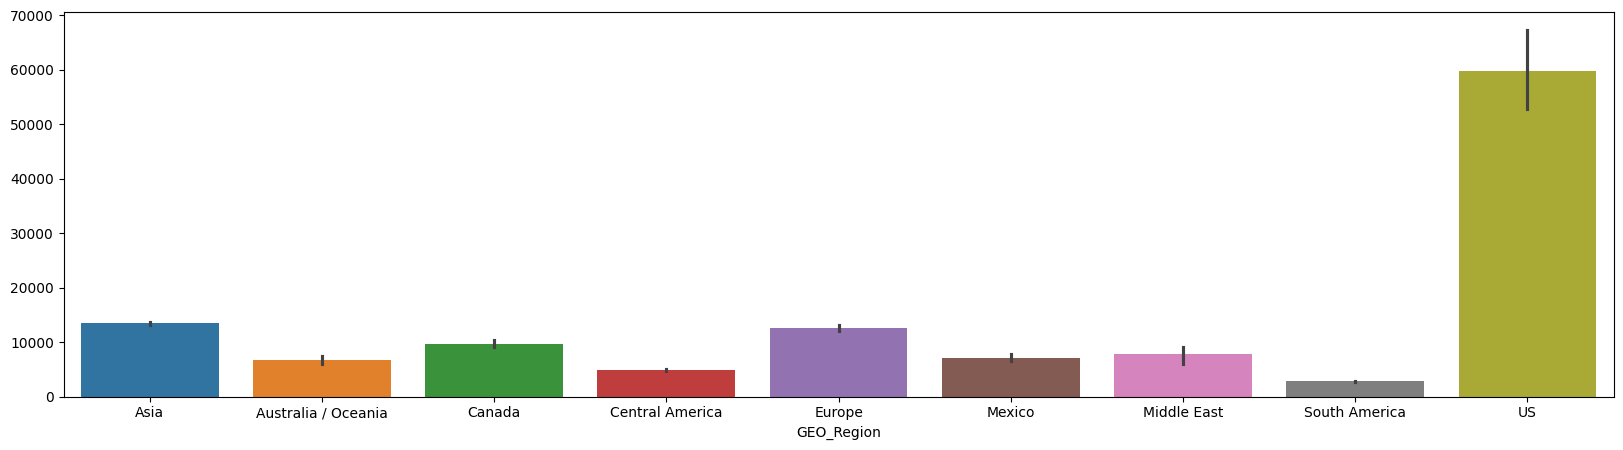

In [19]:
fig = plt.subplots(figsize=(20, 5))
sns.barplot( data=pivot_Airline)

In [20]:
pivot_Airline1 = Airline.pivot_table(index='Year', columns='Operating_Airline', values='Passenger_Count',margins=True).fillna("")
pivot_Airline1

Operating_Airline,ATA Airlines,Aer Lingus,Aeromexico,Air Berlin,Air Canada,Air Canada Jazz,Air China,Air France,Air India Limited,Air New Zealand,...,US Airways,United Airlines,United Airlines - Pre 07/01/2013,Virgin America,Virgin Atlantic,WestJet Airlines,World Airways,XL Airways France,Xtra Airways,All
Year,,,,,,,,,,,,,,,,,,,,,
2005,13877.0,,,,25728.833333,531.5,4535.083333,9944.750000,,4832.416667,...,36069.833333,53526.250000,55329.401575,,9953.833333,1749.083333,,,,24779.903597
2006,7556.857143,,,,25144.916667,254.666667,4894.333333,9828.875000,,6565.000000,...,35000.770833,52460.333333,50951.029304,,9743.125000,514.5,,,73.0,24348.407597
2007,151.333333,2451.5,262.0,,26051.458333,,6508.125000,9628.875000,,7575.458333,...,40672.047619,55738.625000,48098.311864,29201.6,9766.083333,,,,,25233.557133
2008,66.0,4370.708333,,,23327.375000,,6125.541667,10090.583333,,7391.208333,...,71005.375,55922.208333,45322.782313,75167.333333,8986.041667,,,,,25983.725052
2009,,3251.65,2161.892857,,22727.500000,,5084.458333,10245.083333,,5892.500000,...,68062.291667,59538.291667,45014.025547,98486.333333,8854.791667,1541.2,257.0,,,26804.696339
2010,,,3235.333333,2009.916667,23396.541667,,6548.375000,10825.291667,,5845.416667,...,56802.125,62241.416667,46905.276364,60948.375,9014.833333,6421.833333,,,,28383.224150
2011,,,3340.458333,2433.75,14488.825000,,7060.750000,12401.375000,,7159.000000,...,65548.125,67011.346154,48719.115672,52817.762712,8979.666667,7179.166667,,,,29444.450360
2012,,,3106.333333,2518.583333,11705.708333,,7151.375000,13378.000000,,7392.280000,...,64322.0,147137.208333,51464.790698,81641.4375,10797.541667,6000.533333,271.0,1558.1,,32220.526125
2013,,,4949.291667,,12781.833333,,7596.200000,13368.875000,,8812.208333,...,67452.708333,114761.203883,59401.322222,79488.5,9825.541667,6132.214286,,2129.571429,,33097.025037


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Air Canada '),
  Text(1, 0, 'Air China'),
  Text(2, 0, 'Air France'),
  Text(3, 0, 'Air New Zealand'),
  Text(4, 0, 'Alaska Airlines'),
  Text(5, 0, 'All Nippon Airways'),
  Text(6, 0, 'American Airlines'),
  Text(7, 0, 'Asiana Airlines'),
  Text(8, 0, 'British Airways'),
  Text(9, 0, 'Cathay Pacific'),
  Text(10, 0, 'China Airlines'),
  Text(11, 0, 'Delta Air Lines'),
  Text(12, 0, 'EVA Airways'),
  Text(13, 0, 'Frontier Airlines'),
  Text(14, 0, 'Hawaiian Airlines'),
  Text(15, 0, 'Japan Airlines'),
  Text(16, 0, 'KLM Royal Dutch Airlines'),
  Text(17, 0, 'Korean Air Lines'),
  Text(18, 0, 'Lufthansa German Airlines'),
  Text(19, 0, 'Philippine Airlines'),
  Text(20, 0, 'Singapore Airlines'),
  Text(21, 0, 'SkyWest Airlines'),
  Text(22, 0, 'Sun Country Airlines'),
  Text(23, 0, 'TACA'),
  Text(24, 0, 'United Airlines')

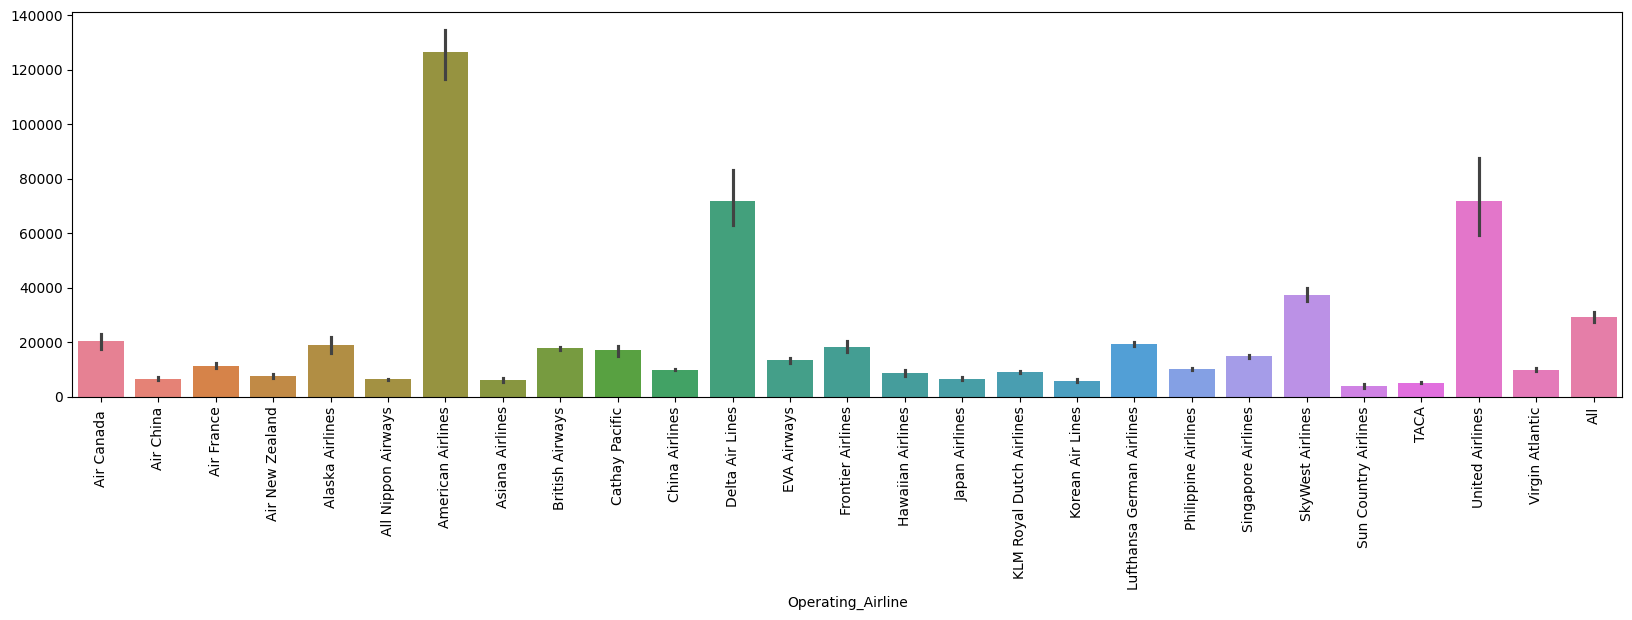

In [21]:
fig = plt.subplots(figsize=(20, 5))
sns.barplot( data=pivot_Airline1)
plt.xticks(rotation = 90)

<Axes: xlabel='Year', ylabel='Passenger_Count'>

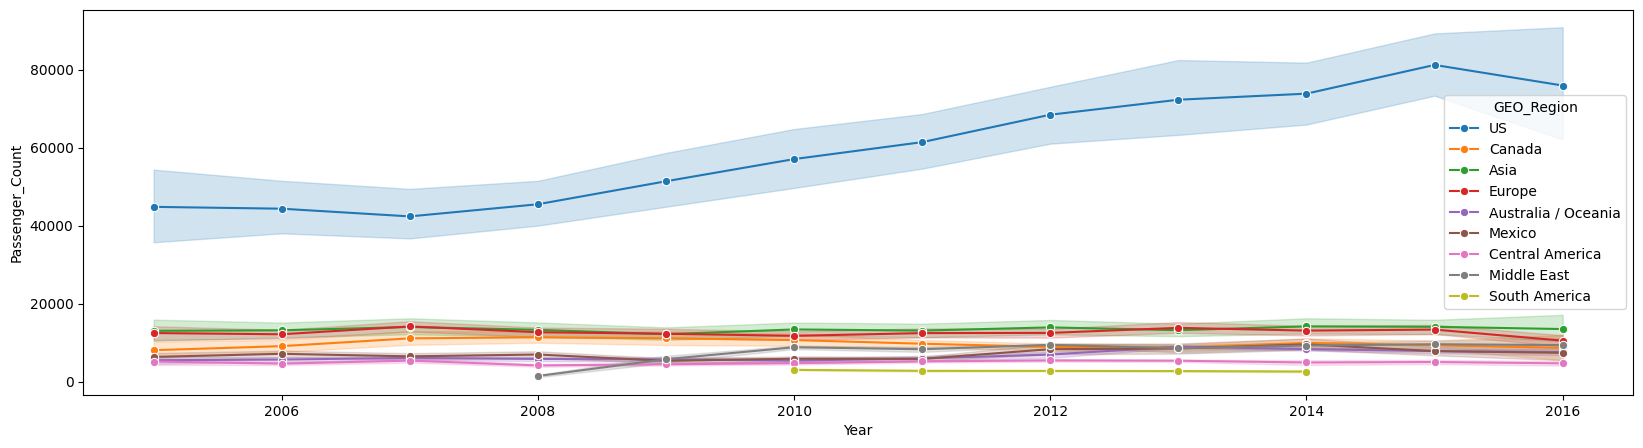

In [22]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Year', y='Passenger_Count',hue='GEO_Region', data=Airline,marker='o')

<Axes: xlabel='Year', ylabel='Passenger_Count'>

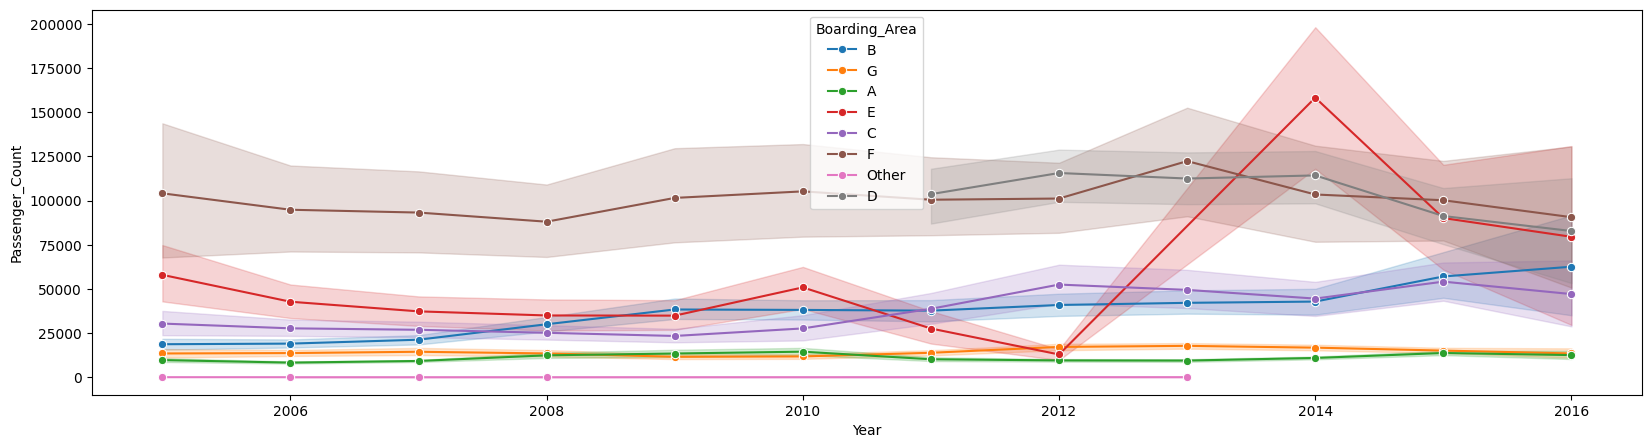

In [23]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Year', y='Passenger_Count',hue = 'Boarding_Area', data=Airline,marker='o')

In [24]:
Airline['Operating_Airline'].unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air ', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'United Airlines - Pre 07/01/2013', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Air Canada Jazz', 'Qantas A

In [25]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

# Airline['Operating_Airline'] = labelencoder.fit_transform(Airline['Operating_Airline'])


In [26]:
# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder()
# Airline = onehotencoder.fit_transform(Airline).toarray()
# Airline

In [41]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline

labelencoder = LabelEncoder()

Airline['Operating_Airline'] = labelencoder.fit_transform(Airline['Operating_Airline'])
Airline['Operating_Airline_IATA_Code'] = labelencoder.fit_transform(Airline['Operating_Airline_IATA_Code'])
Airline['GEO_Region'] = labelencoder.fit_transform(Airline['GEO_Region'])
Airline['Terminal'] = labelencoder.fit_transform(Airline['Terminal'])
Airline['Boarding_Area'] = labelencoder.fit_transform(Airline['Boarding_Area'])

Airline

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,GEO_Region,Terminal,Boarding_Area,Passenger_Count,Year,"(Operating_Airline,)"
0,200507,0,60,8,2,1,27271,2005,0
1,200507,0,60,8,2,1,29131,2005,0
2,200507,0,60,8,2,1,5415,2005,0
3,200507,4,6,2,2,1,35156,2005,4
4,200507,4,6,2,2,1,34090,2005,4
...,...,...,...,...,...,...,...,...,...
15002,201603,71,64,8,3,3,194636,2016,71
15003,201603,71,64,5,0,0,4189,2016,71
15004,201603,71,64,5,3,3,4693,2016,71
15005,201603,72,63,4,0,0,12313,2016,72


In [42]:
scaler = StandardScaler()

Airline_pipe= make_pipeline(scaler(Airline))
Airline_pipe

TypeError: 'StandardScaler' object is not callable

In [29]:
import joblib

In [30]:
joblib.dump(scaler, 'K-meanModel')

['K-meanModel']